In [1]:
import pandas as pd
from sklearn.datasets import load_boston

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=load_boston()
dataset=pd.DataFrame(df.data)
dataset

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [4]:
dataset.columns=df.feature_names
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
## Independent features and dependent features
X=dataset
y=df.target

In [6]:
# Train-Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)



1.   The fit(data) method is used to compute the mean and std dev for a given feature to be used further for scaling. 
2.   The transform(data) method is used to perform scaling using mean and std dev calculated using the .fit() method.
3. The fit_transform() method does both fits and transform.

In [7]:
# Standardization of Dataset using .fit_transform and .transform
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [8]:
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

To revert back to original form of the dataset



```
scaler.inverse_transform(X_train)
```



In [9]:
#Importing Linear Regression Model

from sklearn.linear_model import LinearRegression

#Using Cross Validation on the model

from sklearn.model_selection import cross_val_score

In [10]:
regression=LinearRegression()

In [11]:
regression.fit(X_train,y_train)

LinearRegression()

In [12]:
#Cross Validation with 10 iteration and using MSE to check performance

mse=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=10)

In [13]:
#Prection using constructed model

reg_pred=regression.predict(X_test)

In [14]:
#Prediction metric

from sklearn.metrics import r2_score

score= r2_score(reg_pred,y_test)
print(score)

0.6693702691495592


Regularization- Used to prevent overfiiting of Linear Regression Models.

1. Ridge Regression (L2 Regularization) - Prevents overfiitng by adding a term (+ λ (slope)**2) to the cost function to reduce overfitting.

2. Lasso Regression (L1 Regularization) - Prevents Overfiiting and helps in feature selection (by only consideration slopes which contribute to line fiiting) by adding (+ λ |slope|) to the cost function.

In [15]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [16]:
ridge_regressor= Ridge()

In [17]:
parameters={"alpha":[0.1,0.5,1,2,5,7,10,20,30,40]}

ridgecv=GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error',cv=10)

In [19]:
ridgecv.fit(X_train,y_train)
print(ridgecv.best_params_)

{'alpha': 10}


In [20]:
print(ridgecv.best_score_)

-25.419809632613358


In [21]:
ridge_pred=ridgecv.predict(X_test)

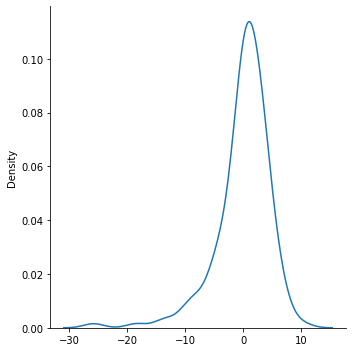

In [22]:
import seaborn as sns
sns.displot(ridge_pred-y_test,kind='kde')

In [23]:
score=r2_score(ridge_pred,y_test)

In [24]:
score

0.6468557055633644

Lasso Regression

In [25]:
from sklearn.linear_model import Lasso
lasso=Lasso()

parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
lassocv=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lassocv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

{'alpha': 1}
-31.153603752119004


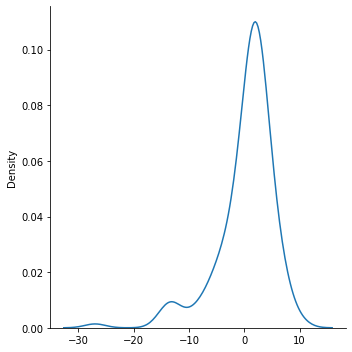

In [26]:
print(lassocv.best_params_)
print(lassocv.best_score_)
lasso_pred=lassocv.predict(X_test)
import seaborn as sns
sns.displot(lasso_pred-y_test,kind='kde')